In [1]:
import glob

input_data = sorted(glob.glob('*/G*/*'))
output_data = sorted(glob.glob('*/M*/*'))

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,UpSampling2D, Input

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def get_value(s):
    return float(s[s.find("(")+1:s.find(")")])
    
def get_list_from_string(L):
    return map(get_value, L.split('/')[-1].split('_')[-3:])
    

print np.array(map(get_list_from_string,input_data))
print
print np.array(map(get_list_from_string,output_data))



np.loadtxt(input_data[0], delimiter=',')

X = np.array(map(lambda x: np.loadtxt(x, delimiter=','), input_data[:100]))
y_temp = np.array(map(lambda x: np.loadtxt(x, delimiter=','), output_data[:100]))

print X.shape
print y_temp.shape

/Users/nickvazz/Desktop/virtualenvs/2MLenv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[  10.  -10.  -10.]
 [  10.  -10. -100.]
 [  10.  -10. -110.]
 ...
 [  65.  -40.  -10.]
 [  65.  -40.  -20.]
 [  65.  -40.  -30.]]

[[  10.  -10.  -10.]
 [  10.  -10. -100.]
 [  10.  -10. -110.]
 ...
 [  65.  -40.  -10.]
 [  65.  -40.  -20.]
 [  65.  -40.  -30.]]
(100, 128, 128)
(100, 384, 128)


In [3]:
X = X.reshape(-1,128,128,1)
y = y_temp.reshape(y_temp.shape[0],3,128,128)
y = np.transpose(y, (0,2,3,1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print X.shape
print y.shape



(100, 128, 128, 1)
(100, 128, 128, 3)


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(UpSampling2D(size=(2,2)))
# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(UpSampling2D(size=(2,2)))
# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(UpSampling2D(size=(2,2)))
# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(UpSampling2D(size=(2,2)))
# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(UpSampling2D(size=(2,2)))
# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(3, (3, 3),padding='same'))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['mse','accuracy'])

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test)
         )

Train on 67 samples, validate on 33 samples
Epoch 1/10
67/67 [==============================] - 10s 146ms/step - loss: 0.6888 - mean_squared_error: 0.2485 - acc: 0.9962 - val_loss: 0.6737 - val_mean_squared_error: 0.2410 - val_acc: 0.9980
Epoch 2/10
67/67 [==============================] - 10s 144ms/step - loss: 0.6585 - mean_squared_error: 0.2333 - acc: 0.9980 - val_loss: 0.6005 - val_mean_squared_error: 0.2046 - val_acc: 0.9980
Epoch 3/10
67/67 [==============================] - 9s 138ms/step - loss: 0.5276 - mean_squared_error: 0.1692 - acc: 0.9980 - val_loss: 0.2840 - val_mean_squared_error: 0.0623 - val_acc: 0.9980
Epoch 4/10
67/67 [==============================] - 9s 139ms/step - loss: 0.1698 - mean_squared_error: 0.0288 - acc: 0.9980 - val_loss: 0.0415 - val_mean_squared_error: 0.0027 - val_acc: 0.9980
Epoch 5/10
67/67 [==============================] - 10s 153ms/step - loss: 0.0301 - mean_squared_error: 0.0018 - acc: 0.9980 - val_loss: 0.0135 - val_mean_squared_error: 0.0010 -

In [5]:
metrics = dict(history.history.items())

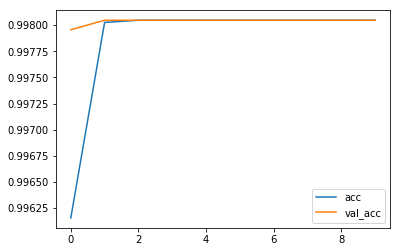

In [6]:
pd.DataFrame(metrics).iloc[:,0::3].plot()

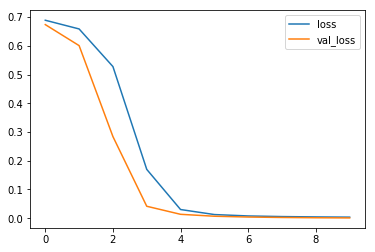

In [7]:
pd.DataFrame(metrics).iloc[:,1::3].plot()

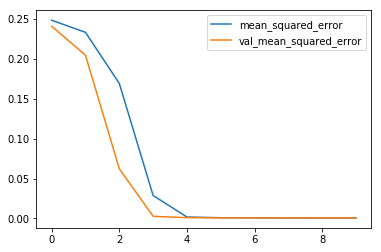

In [8]:
pd.DataFrame(metrics).iloc[:,2::3].plot()

In [9]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 3)       1731      
__________